Выпишем явно тензор натяжений: 

$$
\hat{A}_B = 
\begin{pmatrix}
\dfrac{p_1}{2} & n_1u_xu_y & n_1u_xu_z\\
n_1u_xu_y & \dfrac{p_1}{2} & n_1u_yu_z\\
n_1u_xu_z & n_1u_yu_z & \dfrac{p_1}{2}
\end{pmatrix}
$$

Матрица поворота задается следующим образом: 

$$
\hat{\cal {O}} = 
\begin{pmatrix}
\cos{\alpha} & 0 & \sin{\alpha}\\
0 & 1 & 0\\
-\sin{\alpha} & 0 & \cos{\alpha}
\end{pmatrix}
$$

Где:
$$ \cos{\alpha} = \dfrac{B_z}{\sqrt{B_x^2+B_z^2}} $$


$$\\ \sin{\alpha} =- \dfrac{B_x}{\sqrt{B_x^2+B_z^2}} $$

После преобразование $A_B = \hat{\cal {O}}\ A\ \hat{\cal {O}}^T $, учитывая определение анизотропии $\Lambda =\dfrac{2p_{||}-p_{\perp1} - p_{\perp2}}{4B^2}$  получим для нее выражение: 

$$
\Lambda = -\dfrac{3\cos{\alpha} \sin{\alpha} \ n_1u_xu_z}{2B^2}
$$

Теперь добавляем холодные протоны, из-за чего меняется $p_e$ : 

$$
p_e = (2+a_c)n_1\beta_e 
$$

Тогда система дифференциальных уравнений преобразуется в следующую систему: 

$$
\begin{cases}
\dfrac{dB_x}{dz} = nu_y  - \dfrac{d \left(\Lambda B_x \right) }{dz}\\ 
\\
\dfrac{du_y}{dz} = B_x(1-n) \\
\\
\dfrac{d}{dz} \left(\dfrac{B^2_z}{n} + \dfrac{\beta_i n^{\gamma}}{2} + \dfrac{1}{4} (2+\alpha_c)n\beta_e \right) = -B_xnu_y \\
\end{cases} 
$$

In [1]:
from scipy.integrate import solve_ivp
import numpy as np

In [2]:
def plasma(t,z,a,b,c,d,p): #a = B_z, b = gamma, c = beta_i, d = beta_e, p - alpha_c
    x, y, n = z #x = Bx, y = uy
    return [n*y/(1+3/4*a**2*(3*x**2*(x**2+a**2)**2-4*x**4*(x**2+a**2))/(x**2+a**2)**4), 
            x*(1-n),
            -x*y*n/(c*b*n**(b-1)/2+(2+p)*d/4-(a**2/n**2))]

In [3]:
z1 = np.arange(0,4,1e-6)
z1

array([0.000000e+00, 1.000000e-06, 2.000000e-06, ..., 3.999997e+00,
       3.999998e+00, 3.999999e+00])

In [13]:
sol = solve_ivp(plasma,[0,4],[0,0.412,1.42],t_eval = [1], args=(0.05, 5/3, 1, 0.5, 1), rtol = 1e-13,atol = 1e-14)

In [4]:
import matplotlib.pyplot as plt

In [14]:
Bx = sol.y[0]
u = sol.y[1]
n = sol.y[2] 
z = sol.t
Bz = 0.05

In [17]:
Bx

array([0.51962751])

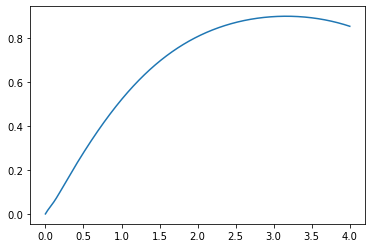

In [8]:
plt.plot(z,Bx)

$$
\begin{cases}
\dfrac{dB_x}{dz} = u_y  f(B_x)\\ 
\\
\dfrac{du_y}{dz} = g(B_x)
\end{cases} 
$$


$$ B^2_x = 1 + \beta_i(1-n^\gamma)+\beta_e(1-n)+2B^2_z(1-1/n) $$

In [10]:
from scipy.optimize import fsolve

In [11]:
def n_bx (x,Bx,gamma, beta_i, beta_e,Bz):
    func = 1+beta_i*(1-x**gamma)+beta_e*(1-x)+2*Bz**2*(1-1/x) - Bx**2
    return func

def n_B(Bx,gamma, beta_i, beta_e,Bz): #n_B = n(B_x)
    return fsolve(n_bx,1,args = (Bx,gamma, beta_i, beta_e,Bz))


In [246]:
def f(Bx):
    return n_B(Bx,*b)/(1+3/4*Bz**2*(3*Bx**2*(Bx**2+Bz**2)**2-4*Bx**4*(Bx**2+Bz**2))/(Bx**2+Bz**2)**4)

def g(Bx):
    return Bx*(1-n_B(Bx,*b))

In [28]:
import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate

In [142]:
f = interpolate.interp1d(z, Bx)
xnew = np.arange(0,4,1e-7)
ynew = f(xnew)
#plt.plot(xnew,ynew)

#ynew[200] - ynew[199]
#plt.plot(z,Bx)

In [152]:
def deriv(f,x):
    der = [(f[i-2]-2*f[i-1]+f[i])/(x[i] - x[i-1]) for i in range(2,x.shape[0])]
    return der

In [9]:
def deriv2(f,x): #вторая производная
    der = [(f[i-2]-2*f[i-1]+f[i])/(x[i] - x[i-1])**2 for i in range(2,x.shape[0])]
    return der

In [10]:
B22 = deriv2(Bx,z)


In [11]:
len(B22), z.shape

(3999998, (4000000,))

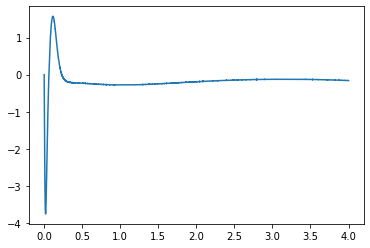

In [12]:
plt.plot(z[2:],B22)

In [12]:
gamma, beta_i, beta_e, Bz = 5/3, 1, 0.5, 0.1
b = gamma, beta_i, beta_e, Bz #b - набор параметров, описывающих ток
n_B(0.5,*b)

array([1.32258903])

In [118]:
G = n/(1+3/4*Bz**2*(3*Bx**2*(Bx**2+Bz**2)**2-4*Bx**4*(Bx**2+Bz**2))/(Bx**2+Bz**2)**4)
F = Bx*(1-n)
U = F / G

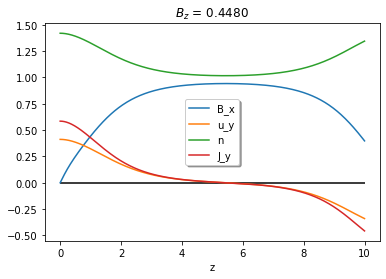

In [7]:
for i in range(0,1):
    sol1 = solve_ivp(plasma,[0,10],[0,0.412,1.42], args=(0.448+0.0005*i, 5/3, 1, 0.5, 1), rtol = 1e-12,atol = 1e-14)
    t = sol1.t
    z = sol1.y
    jy = sol1.y[1]*sol1.y[2]

    fig, ax = plt.subplots()
    plt.plot(t,z.T)
    plt.plot(t,jy)
    ax.hlines(0,0,10, color = 'black')
    plt.xlabel('z')
    plt.title('$B_z$ = %.4f' % (0.448+0.001*i))
    plt.legend(['B_x', 'u_y','n','J_y'], shadow=True)
    plt.show()

In [45]:
def B_x(x):
    solve = solve_ivp(plasma,[-1,5],[0,0.412,1.42],t_eval = [x], args=(0.05, 5/3, 1, 0.5, 1), rtol = 1e-13,atol = 1e-14)
    B1x = solve.y[0]
    return B1x[0]

In [51]:
B_x(0),dev_Bx(1e-4),dev2_Bx(1e-4)

(0.5196275058265428, 0.41618040193203143, -0.2782856167726777)

In [20]:
from scipy.misc import derivative

In [47]:
def dev_Bx(x):
    dev = derivative(B_x, x, dx = 1e-4)
    return dev
def dev2_Bx(x):
    dev = derivative(B_x, x, dx = 1e-4, n = 2)
    return dev

In [48]:
def intfunc(x):
    return dev_Bx(x)*dev2_Bx(x)

In [56]:
def W_x(x):
    return integrate.quad(intfunc,0,x)

(-0.06535922352063837, 6.257417633533772e-10)